## EL7024 - Teoría de Información: Fundamentos y Aplicaciones
# Proyecto Final <br/> Método No Paramétrico de Segmentación de Imágenes Basado en Teoría de Información
## Felipe Córdova y Miguel Videla
Fecha de Entrega: Viernes 24 de Agosto de 2018

In [0]:
!pip install imageio
!pip install scikit-fmm

import time
import skfmm
import imageio
import numpy as np
import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
from skimage import color, io, measure
from skimage.transform import resize
from skimage.draw import circle
from scipy.ndimage import gaussian_gradient_magnitude
from google.colab import files

    100% |████████████████████████████████| 3.3MB 5.8MB/s 
    100% |████████████████████████████████| 419kB 5.1MB/s 
  Running setup.py bdist_wheel for scikit-fmm ... - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/56/22/a9/af15946d932155189c4ee75c7d4e9e7a48a0ebbda0aef23246
Successfully built scikit-fmm


## 0. Images Upload

In [0]:
# Upload a file
def getLocalFiles():
  _files = files.upload()
  if len(_files) > 0:
    for k,v in _files.items():
      open(k,'wb').write(v)
      
getLocalFiles()

Saving mono.png to mono.png


## 1. Information Active Contour

### 1.1. Auxiliary Functions

In [0]:
def default_phi(x, width):
  phi = np.ones(x.shape[:2])
  phi[width:-1*width, width:-1*width] = -1.
  return phi
  
def circular_phi(x, radius):
  phi = np.ones(x.shape[:2])
  rr, cc = circle(round(x.shape[0] / 2), round(x.shape[1] / 2), radius)
  phi[rr, cc] = -1.
  return phi
  
def grad(x):
  return np.gradient(x)

def norm(x, axis=0):
  dx, dy = x
  return np.sqrt(np.square(dx) + np.square(dy))
  
def curvature_c(curve_points):
  x = curve_points[:,0]
  y = curve_points[:,1]
  dx = np.gradient(x)
  dy = np.gradient(y)
  d2x = np.gradient(dx)
  d2y = np.gradient(dy)
  num = np.abs(dx * d2y - d2x * dy)
  den = (dx ** 2 + dy ** 2) ** (2/3) + 1e-8
  cur = num / den
  return cur

def fill_borders_with(image, value, border_width=1):
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      if x < border_width or x >= image.shape[0] - border_width or y < border_width or y >= image.shape[1] - border_width:  
        image[x][y] = value
  return image

def intensity_of_positions(pos_array, image):
  intensities = []
  for point in pos_array:
    intensities.append(image[int(point[0])][int(point[1])])
  return intensities

def velocity_estimation(contour_vec_intensities, sample_plus, sample_minus, sigma):
  cn_vec_velocities = []
  p_plus_vec = []
  for sample in sample_plus:
    p_plus_vec.append(kernel_estimation(sample, sample_plus, sigma))
  p_minus_vec = []
  for sample in sample_minus:
    p_minus_vec.append(kernel_estimation(sample, sample_minus, sigma))
  for c_intensities in contour_vec_intensities:
    c_velocities = []
    for c_intensity in c_intensities:
      p_plus = kernel_estimation(c_intensity, sample_plus, sigma)
      p_minus = kernel_estimation(c_intensity, sample_minus, sigma)
      first_term = np.log(p_plus / p_minus)
      second_term = updating_implication(c_intensity, sample_plus, p_plus_vec, sigma)
      third_term = updating_implication(c_intensity, sample_minus, p_minus_vec, sigma)
      final_term = first_term + second_term - third_term
      c_velocities.append(final_term)
    cn_vec_velocities.append(c_velocities)
  return cn_vec_velocities
      
def kernel_estimation(target, sample_vec, sigma):
  output = 0
  for sample in sample_vec:
    output += kernel(target, sample, sigma) / len(sample_vec)
  return output

def kernel(x1, x2, sigma):
  return (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp((x1 - x2) / 2 * sigma ** 2)

def updating_implication(c_intensity, sample_vec, p_sample_vec, sigma):
  output = 0
  for sample, p_sample in zip(sample_vec, p_sample_vec):
    output += kernel(sample, c_intensity, sigma) / (p_sample * len(sample_vec))
  return output

def set_values(original_array, idx_array, values_array):
  for i in range(len(idx_array)):
    original_array[idx_array[i][0]][idx_array[i][1]] = values_array[i]
  return original_array  

def get_values(array, idx):
  values = []
  for y, x in idx:
    values.append(array[y][x])
  return values

def get_curves_from_contour(contour):
  """Recibe un objeto plt.contour() y retorna un arreglo de arreglos de puntos por curva."""
  points = []
  curves = contour.collections[0].get_paths()
  for curve in curves:
    points.append(print(np.unique(np.round(curve.vertices), axis=0)))
  return points

### 1.2. Algorithm Implementation

Elapsed Time on Iteration 1 | 0.80 Minutes


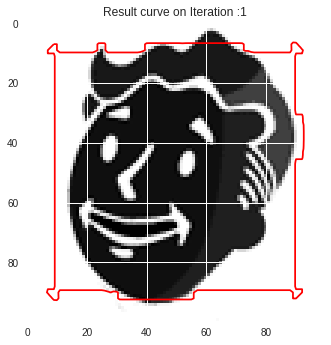

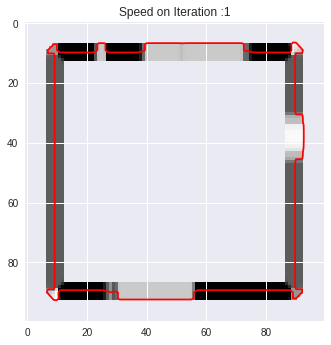

Elapsed Time on Iteration 2 | 1.05 Minutes


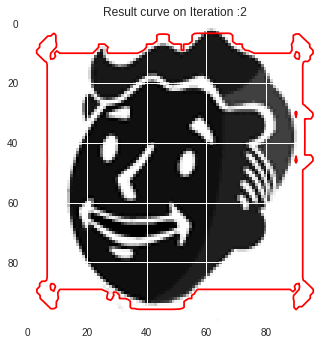

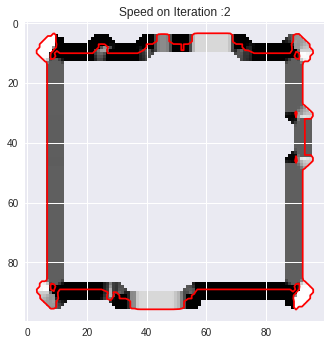

Elapsed Time on Iteration 3 | 1.59 Minutes


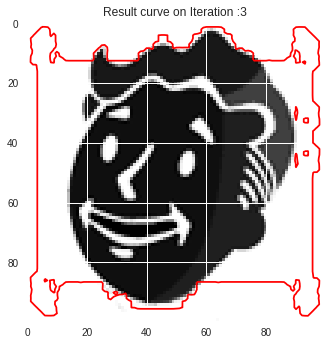

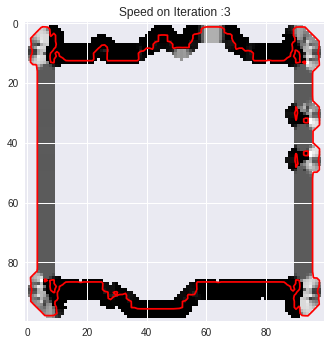

Elapsed Time on Iteration 4 | 2.09 Minutes


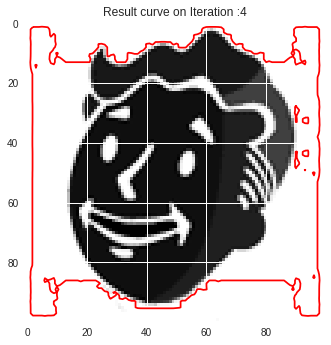

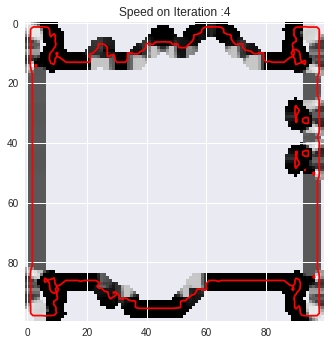

Elapsed Time on Iteration 5 | 2.15 Minutes


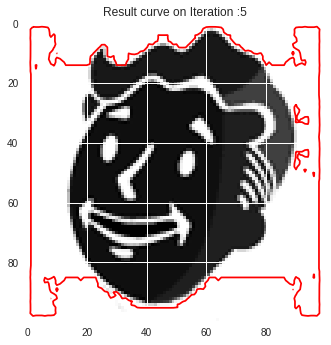

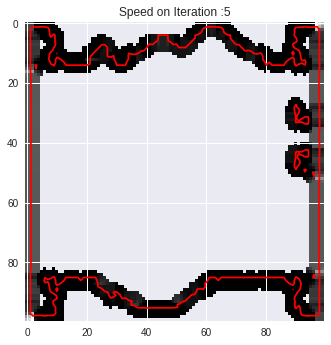

Elapsed Time on Iteration 6 | 2.32 Minutes


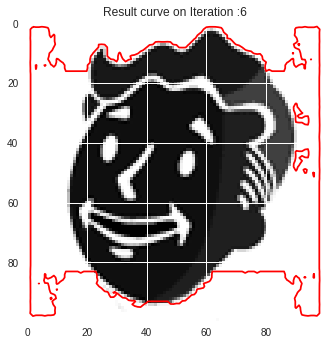

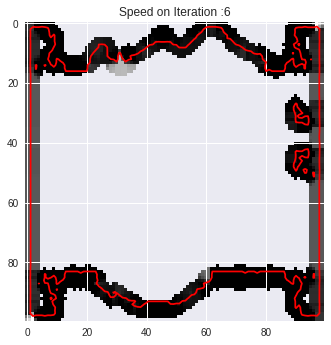

Elapsed Time on Iteration 7 | 2.37 Minutes


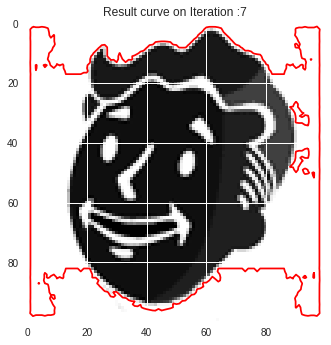

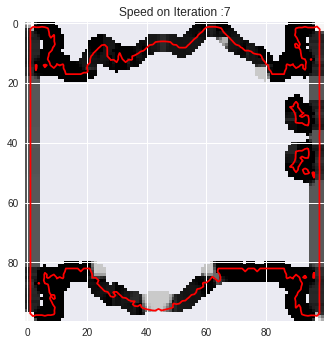

Elapsed Time on Iteration 8 | 2.51 Minutes


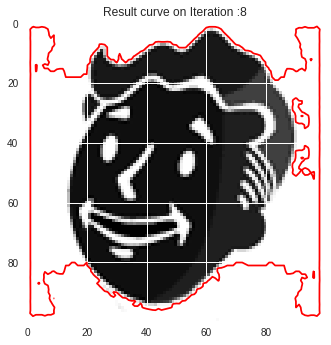

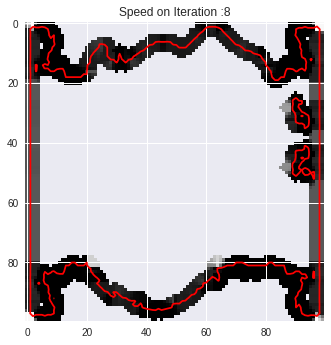

Elapsed Time on Iteration 9 | 2.64 Minutes


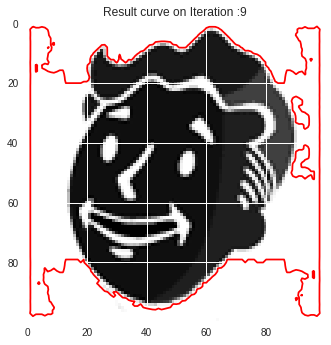

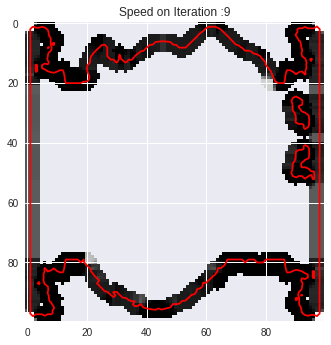

Elapsed Time on Iteration 10 | 2.61 Minutes


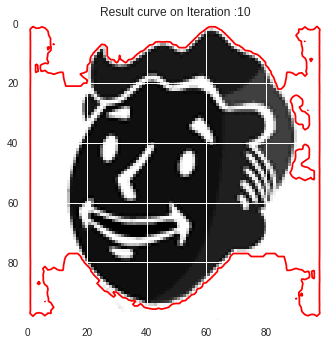

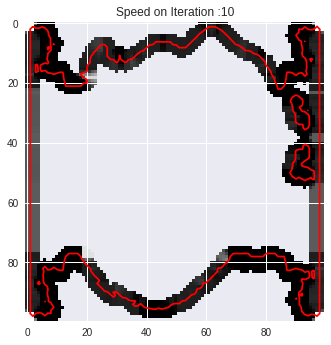

Elapsed Time on Iteration 11 | 2.77 Minutes


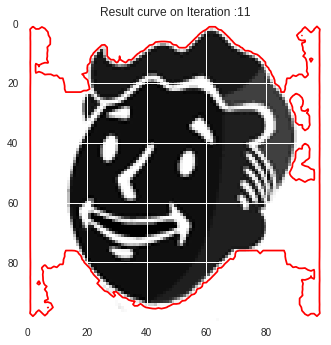

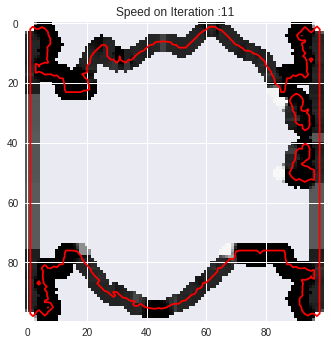

Elapsed Time on Iteration 12 | 2.72 Minutes


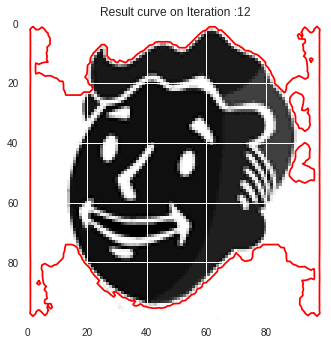

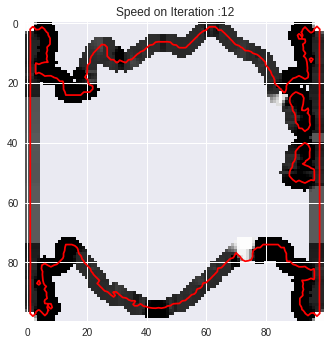

Elapsed Time on Iteration 13 | 2.70 Minutes


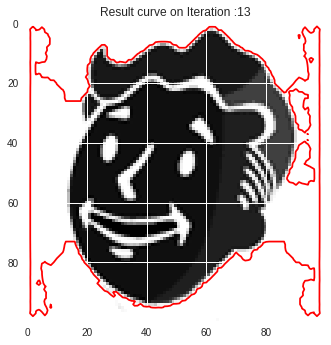

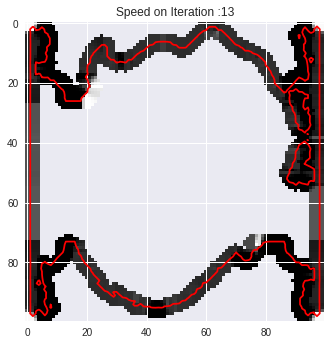

Elapsed Time on Iteration 14 | 2.74 Minutes


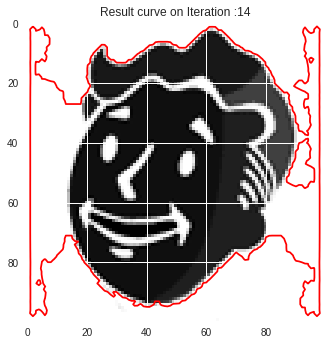

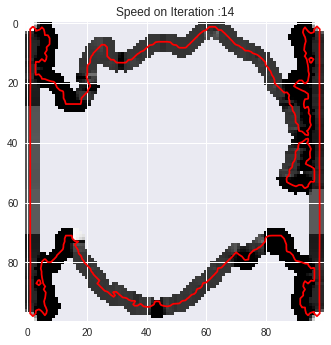

Elapsed Time on Iteration 15 | 2.76 Minutes


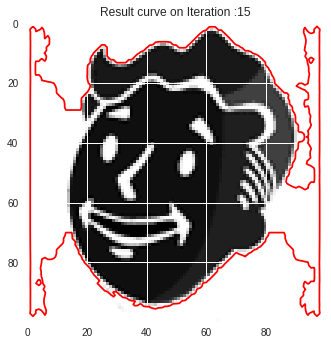

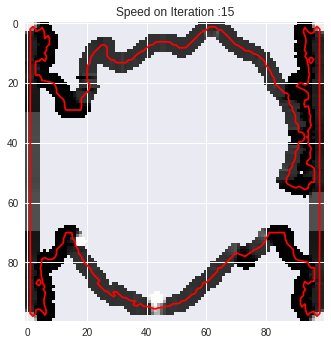

Elapsed Time on Iteration 16 | 2.77 Minutes


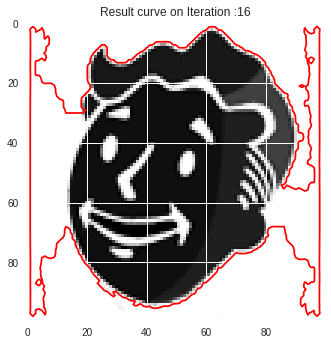

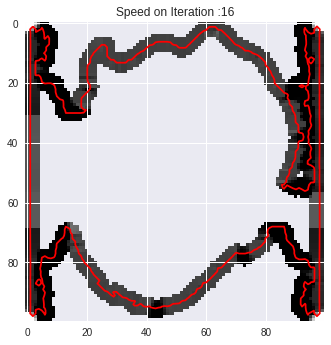

Elapsed Time on Iteration 17 | 2.79 Minutes


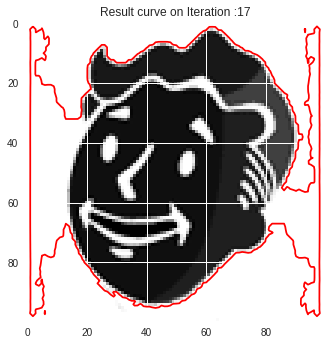

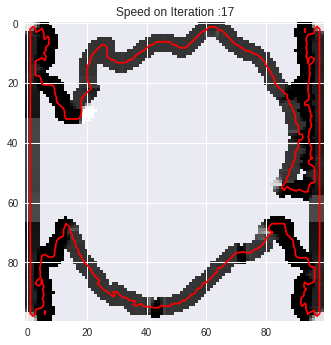

Elapsed Time on Iteration 18 | 2.83 Minutes


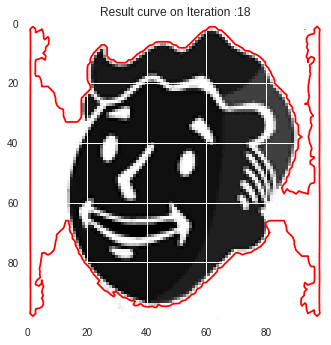

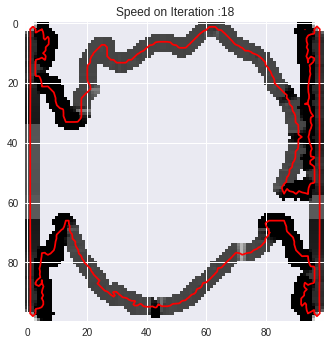

Elapsed Time on Iteration 19 | 2.87 Minutes


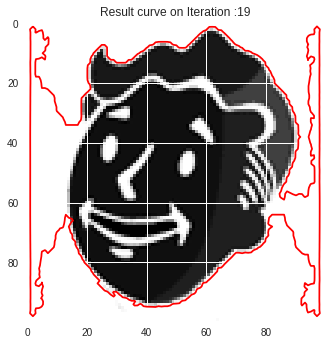

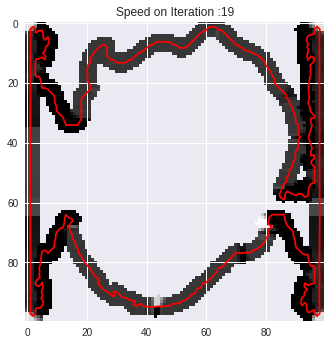

Elapsed Time on Iteration 20 | 2.91 Minutes


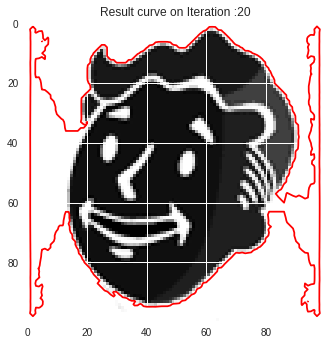

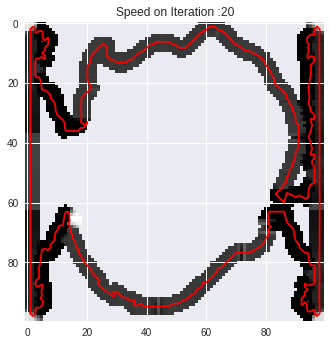

Elapsed Time on Iteration 21 | 3.01 Minutes


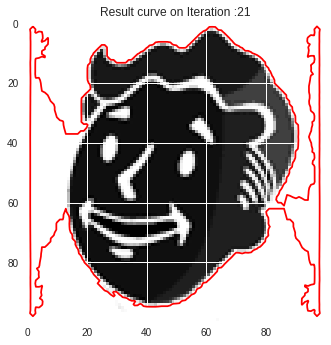

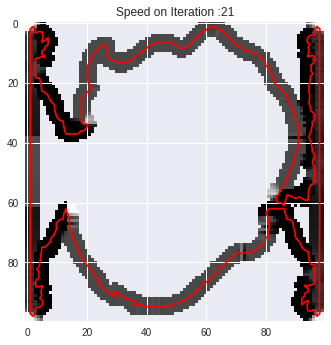

Elapsed Time on Iteration 22 | 3.04 Minutes


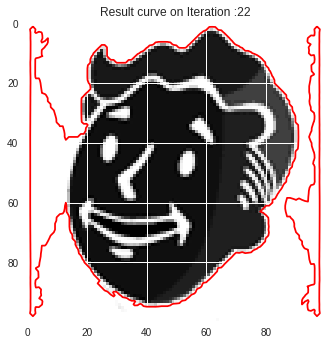

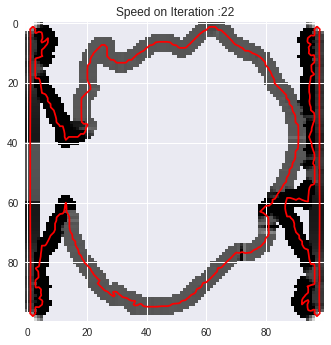

Elapsed Time on Iteration 23 | 3.08 Minutes


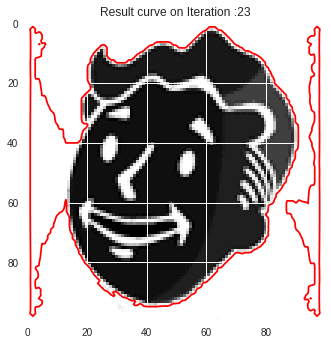

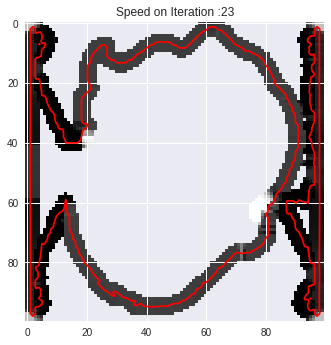

Elapsed Time on Iteration 24 | 2.97 Minutes


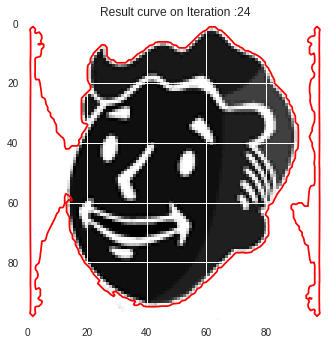

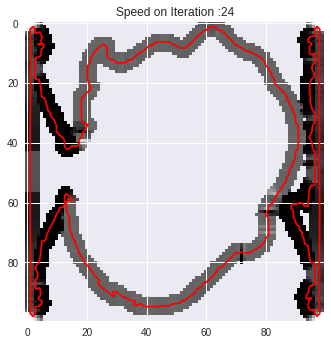

Elapsed Time on Iteration 25 | 2.94 Minutes


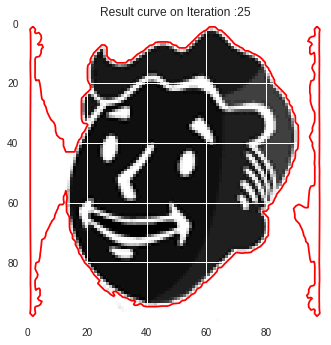

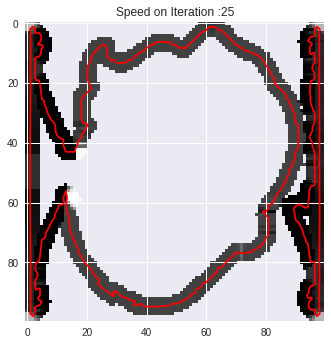

Elapsed Time on Iteration 26 | 2.94 Minutes


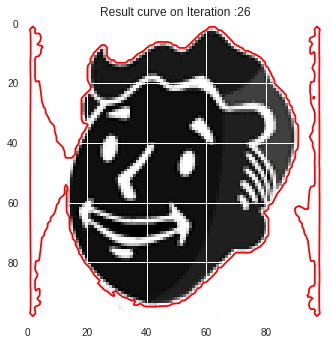

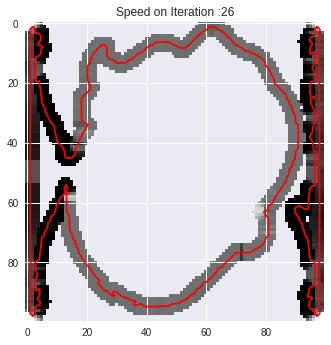

Elapsed Time on Iteration 27 | 2.94 Minutes


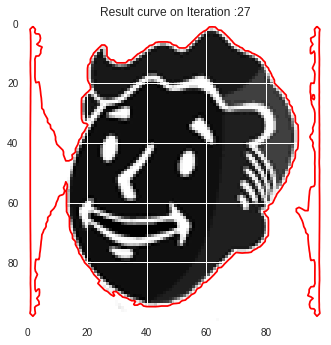

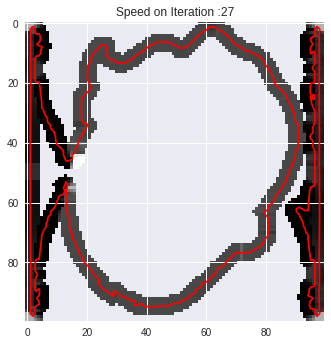

Elapsed Time on Iteration 28 | 2.92 Minutes


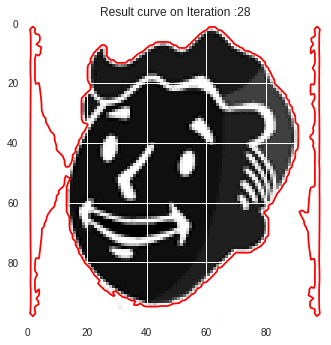

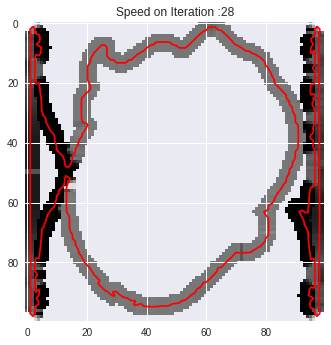

Elapsed Time on Iteration 29 | 2.92 Minutes


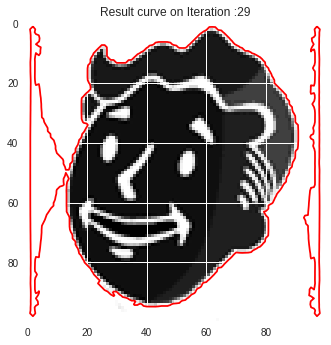

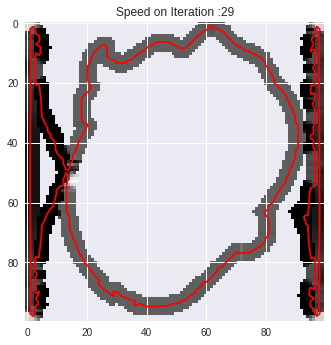

Elapsed Time on Iteration 30 | 2.85 Minutes


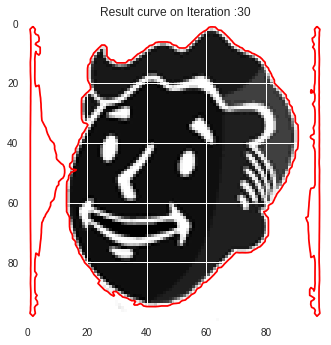

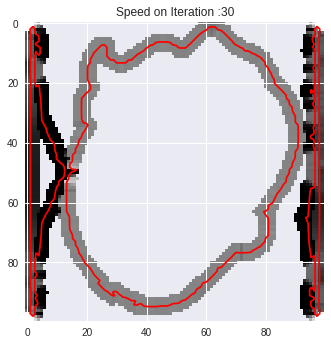

Elapsed Time on Iteration 31 | 2.82 Minutes


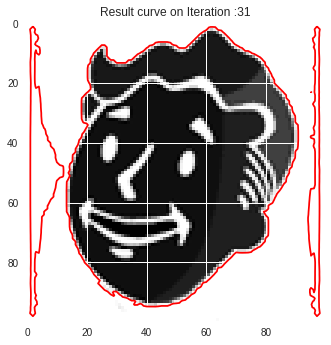

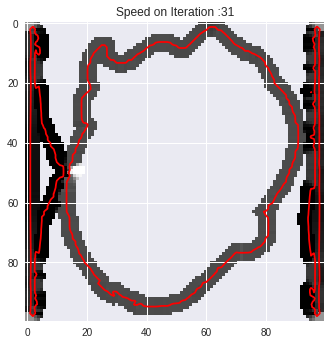

Elapsed Time on Iteration 32 | 2.74 Minutes


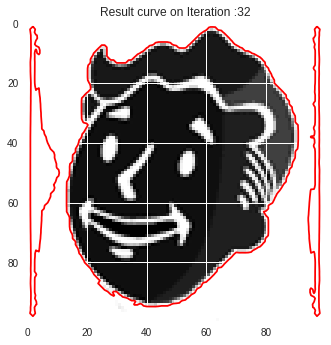

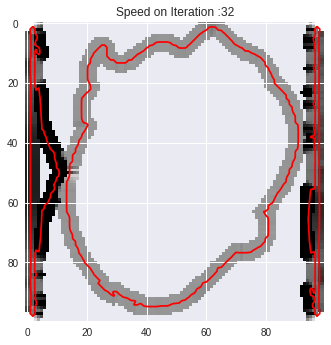

Elapsed Time on Iteration 33 | 2.71 Minutes


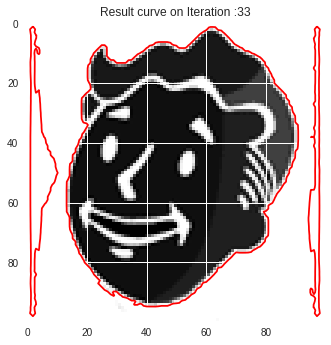

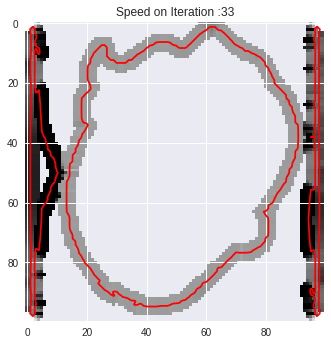

Elapsed Time on Iteration 34 | 2.67 Minutes


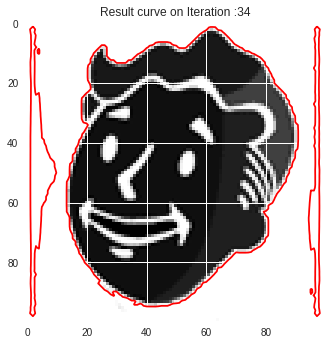

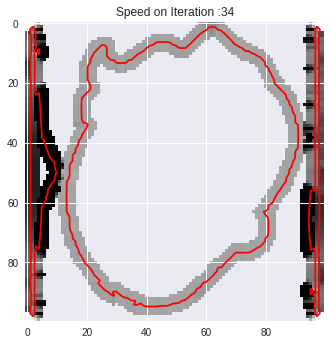

Elapsed Time on Iteration 35 | 2.62 Minutes


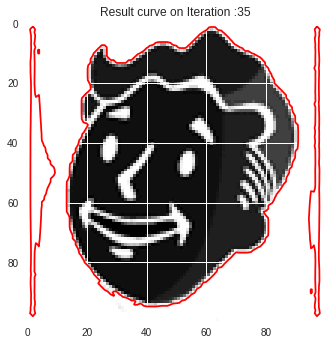

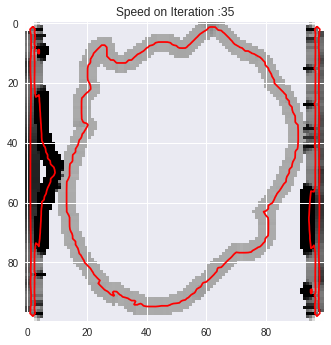

Elapsed Time on Iteration 36 | 2.61 Minutes


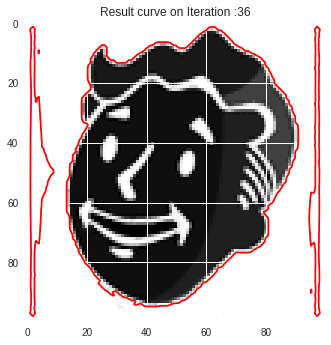

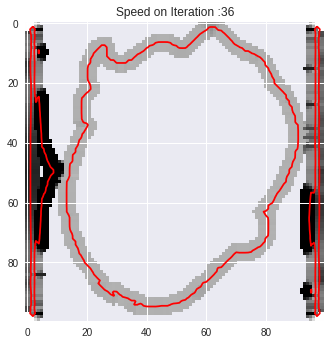

Elapsed Time on Iteration 37 | 2.57 Minutes


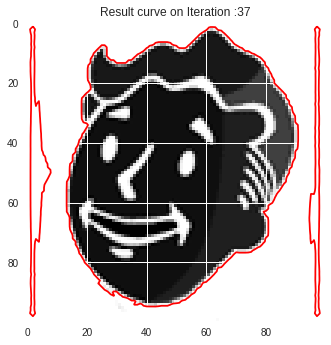

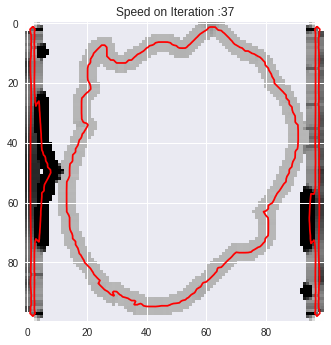

Elapsed Time on Iteration 38 | 2.52 Minutes


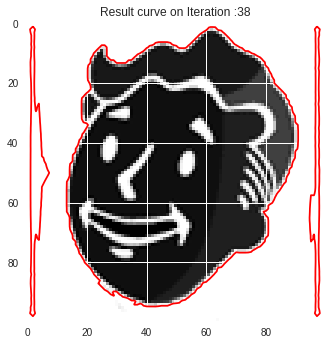

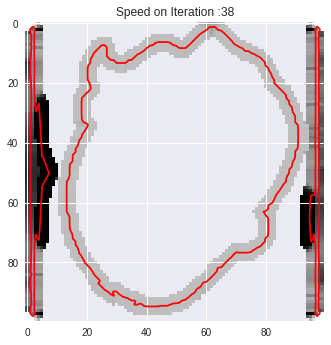

Elapsed Time on Iteration 39 | 2.49 Minutes


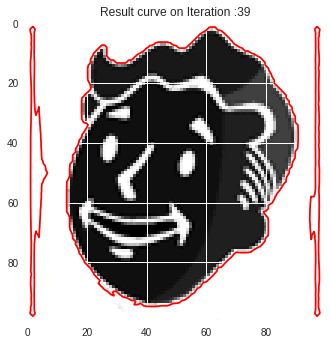

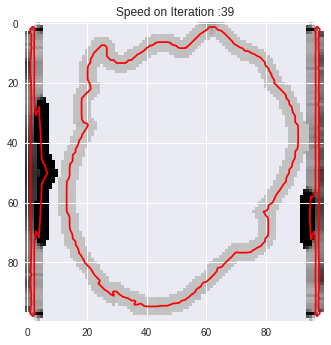

Elapsed Time on Iteration 40 | 2.49 Minutes


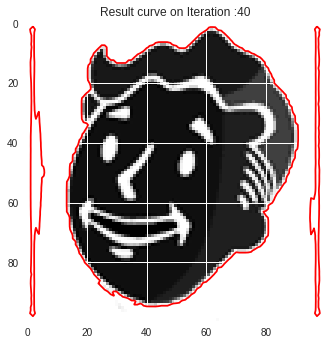

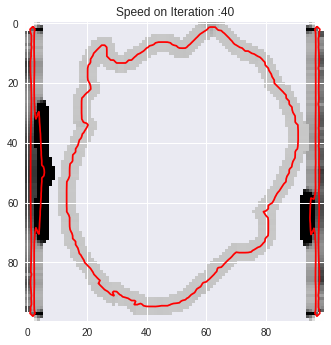

Elapsed Time on Iteration 41 | 2.46 Minutes


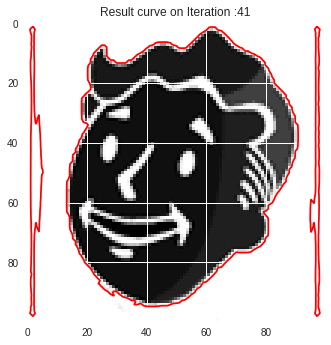

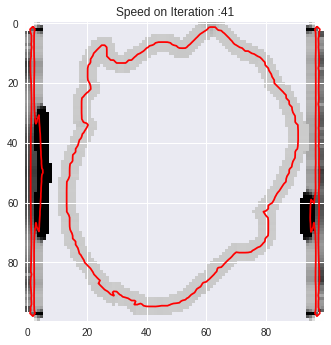

Elapsed Time on Iteration 42 | 2.47 Minutes


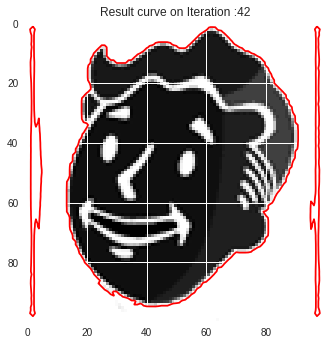

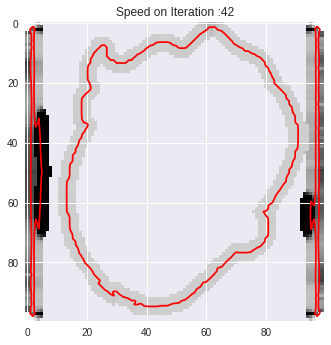

Elapsed Time on Iteration 43 | 2.46 Minutes


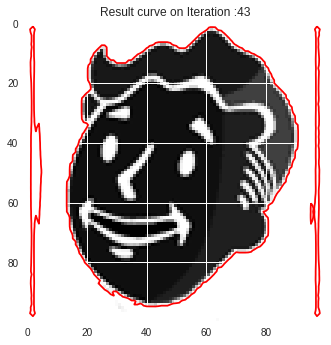

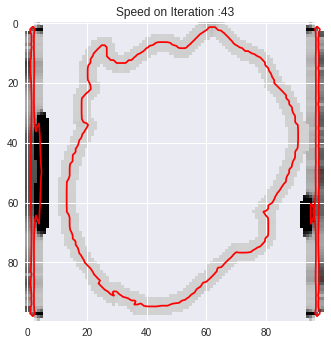

Elapsed Time on Iteration 44 | 2.43 Minutes


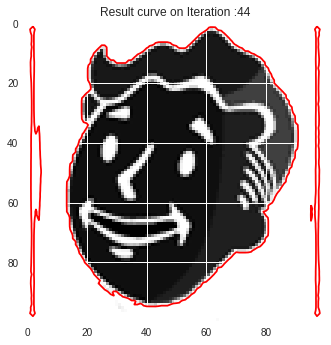

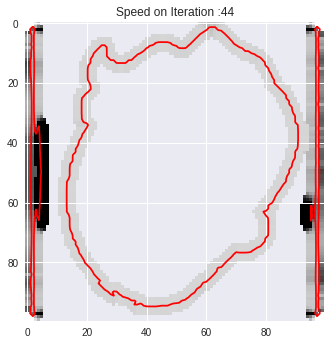

Elapsed Time on Iteration 45 | 2.41 Minutes


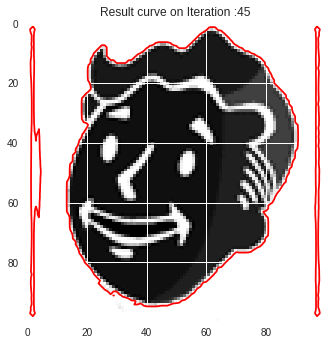

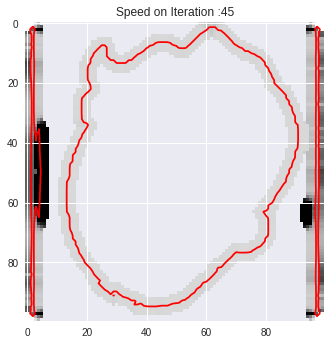

Elapsed Time on Iteration 46 | 2.37 Minutes


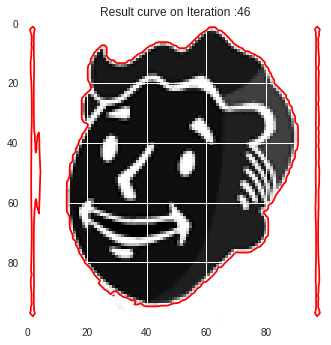

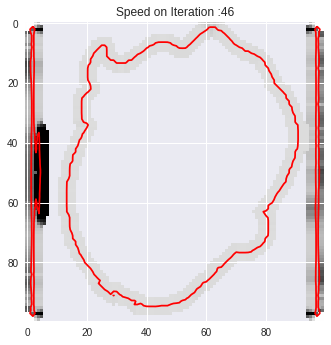

Elapsed Time on Iteration 47 | 2.36 Minutes


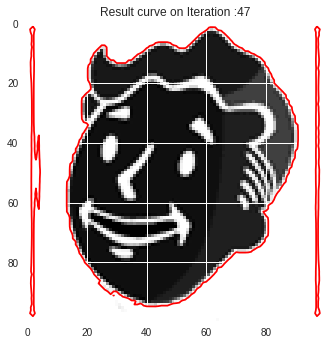

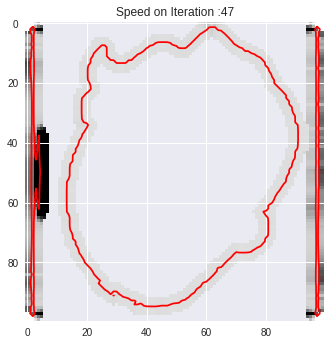

Elapsed Time on Iteration 48 | 2.36 Minutes


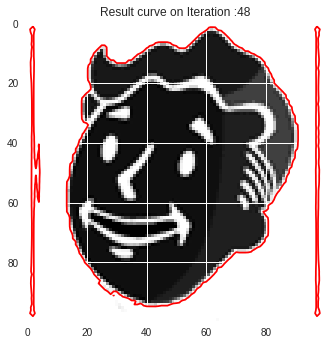

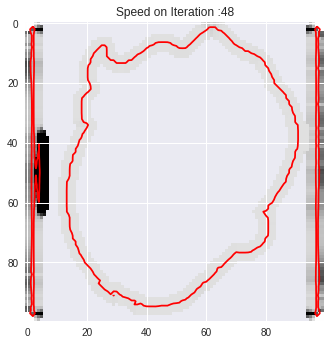

Elapsed Time on Iteration 49 | 2.36 Minutes


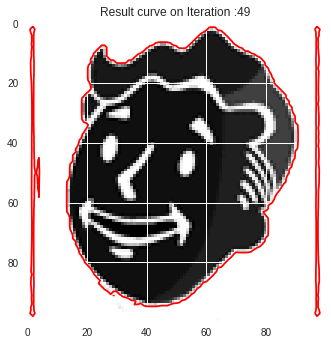

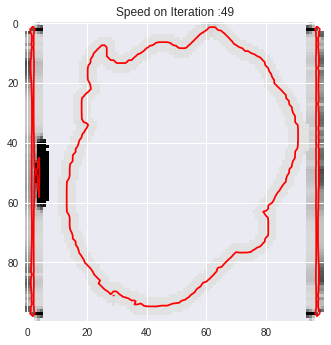

Elapsed Time on Iteration 50 | 2.33 Minutes


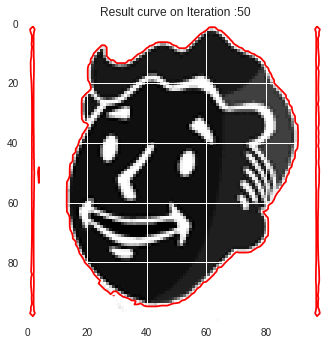

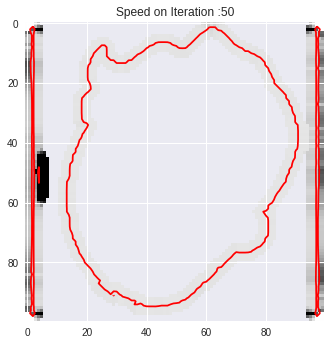

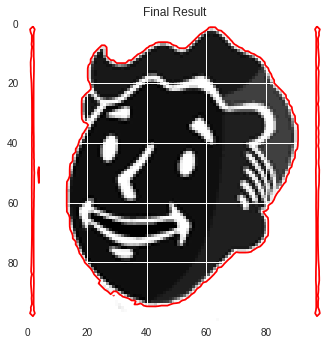

Total Elapsed Time | 128.39 Minutes


In [0]:
# Parameters
n_iteration = 50
iteration_to_show = 1
sigma = np.sqrt(20)
alpha = 1
dt = 1
start_curve_width = 10
narrow_band_width = 3
border_wall = 2
set_landmines = False
set_border_wall = True
phi_recorder = []

# Image Load
img_filename = 'mono.png'
img_ori = io.imread(img_filename)
img = color.rgb2gray(img_ori)

# Algorithm starts
t_starts = time.clock()
phi_0 = default_phi(img, start_curve_width)
phi = phi_0
phi_recorder.append(phi)

for iteration in range(n_iteration):
  t_i = time.clock()
  phi_old = phi
  
  # Calculating narrow band
  dis = skfmm.distance(phi, narrow=narrow_band_width)
  pos = np.ma.masked_where(dis > 1, dis)
  neg = np.ma.masked_where(dis < -1, dis)
  
  # Curve intensities and position obtention 
  cn_vec_pos = [np.argwhere(abs(dis) < 1)] # Considering always just 1 contour curve
  cn_vec_intensities = [] # Vector (Contourns, intensities per point)
  for c_pos in cn_vec_pos:
    cn_vec_intensities.append(intensity_of_positions(c_pos, img))
  
  # Obtaning narrow (pos and neg) positions
  img_pos = np.ma.masked_where(np.ma.getmask(pos), img)
  img_neg = np.ma.masked_where(np.ma.getmask(neg), img)
  
  # Positioning landmines
  if set_landmines:
    pos_safe_tube = np.argwhere(pos >= narrow_band_width - 1)
    neg_safe_tube = np.argwhere(neg <= -(narrow_band_width - 1))
    img_pos = set_values(img_pos, pos_safe_tube, [-narrow_band_width] * len(pos_safe_tube))
    img_neg = set_values(img_neg, neg_safe_tube, [narrow_band_width] * len(neg_safe_tube))
  
  # Obtening pixel intensities from plus (inner) region and minus (outer) region
  sample_plus = img_pos[~img_pos.mask].flatten()
  sample_minus = img_neg[~img_neg.mask].flatten()

  # Calculates velocity per pixel on the curve using information theory background
  cn_vec_velocities = velocity_estimation(cn_vec_intensities, sample_plus, sample_minus, sigma)
  
  # Calculates final velocity per pixel on the curve normalizing and adding  lenght penalization 
  speed = np.zeros_like(phi)
  kappa = curvature_c(cn_vec_pos[0])
  norm_grad = norm(grad(phi))
  
  for c_pos,c_velocity in zip(cn_vec_pos, cn_vec_velocities): # for each curve
    normalization = 1.0 / (2 * max(c_velocity))
    
    for i in range(len(c_pos)): # for each pixel on the curve
      v_final = (c_velocity[i] - alpha * kappa[i]) * normalization
      speed[c_pos[i][0]][c_pos[i][1]] = v_final#*norm_grad[c_pos[i][0]][c_pos[i][1]]
      
  # Extending velocities in normal direction
  d, d_phi = skfmm.extension_velocities(phi, speed)
  
  d_phi = np.ma.array(d_phi, mask=dis.mask, order=1) # Updating just in the narrowband
  phi = phi + dt * d_phi # Evolving the curve
  phi = np.array(phi)
  # Setting the border wall
  if set_border_wall:
    phi = fill_borders_with(phi, 1, border_wall) 
  
  phi_recorder.append(phi) # Saving the curve on the recorder 
  
  if iteration % iteration_to_show == 0:
    print('Elapsed Time on Iteration {} | {:.2f} Minutes'.format(iteration + 1, (time.clock() - t_i) / 60.0))
    plt.figure()
    plt.imshow(img)
    plt.contour(phi, 0,colors='red')
    plt.title('Result curve on Iteration :'+str(iteration+1))
    plt.show()
    
    plt.figure()
    plt.imshow(d_phi)
    plt.contour(phi, 0,colors='red')
    plt.title('Speed on Iteration :'+str(iteration+1))
    plt.show()
    

plt.figure()
plt.imshow(img)
plt.contour(phi, 0,colors='red')
plt.title('Final Result')
plt.show()
print('Total Elapsed Time | {:.2f} Minutes'.format((time.clock() - t_starts) / 60.0))

## 2. Geodesic Active Contour

### 2.1. Auxiliary Functions

In [0]:
def grad(x):
  return np.array(np.gradient(x))

def norm(x, axis=0):
  return np.sqrt(np.sum(np.square(x), axis=axis))

def stopping_fun(x, alpha):
  return 1. / (1. + alpha * norm(grad(x))**2)

def curvature(f):
  fy, fx = grad(f)
  norm = np.sqrt(fx**2 + fy**2)
  Nx = fx / (norm + 1e-8)
  Ny = fy / (norm + 1e-8)
  return div(Nx, Ny)

def div(fx, fy):
  fyy, fyx = grad(fy)
  fxy, fxx = grad(fx)
  return fxx + fyy

def dot(x, y, axis=0):
  return np.sum(x * y, axis=axis)
  
def default_phi(x):
  phi = np.ones(x.shape[:2])
  phi[5:-5, 5:-5] = -1.
  return phi

def circular_phi(x, radius):
  phi = np.ones(x.shape[:2])
  rr, cc = circle(round(x.shape[0] / 2), round(x.shape[1] / 2), radius)
  phi[rr, cc] = -1.
  return phi

def gborders(img, alpha=1.0, sigma=1.0):
  gradnorm = gaussian_gradient_magnitude(img, sigma, mode='constant')
  return 1.0/(1.0 + alpha*gradnorm)

### 2.2. Algorithm Implementation

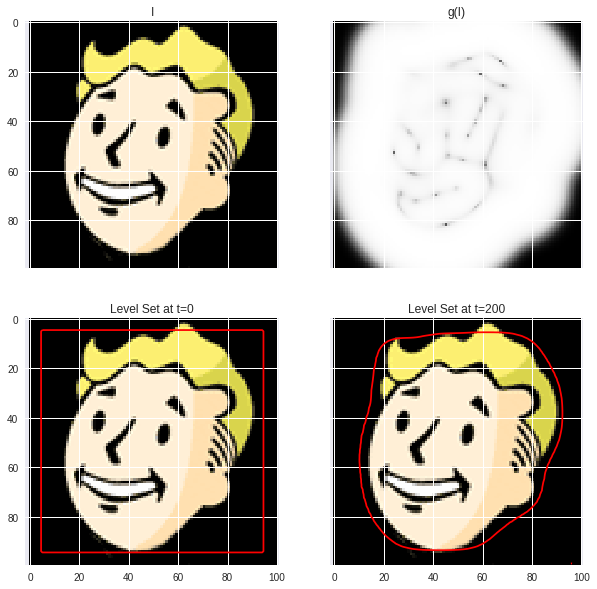

In [0]:
# Parameters
n_iter = 200
phi_0 = default_phi(img)
phi = phi_0
v = 0.5
dt = 1

# Image Preprocessing
img_filename = 'mono.png'
img_ori = io.imread(img_filename)
img = color.rgb2gray(img_ori)
g = gborders(img, alpha=1000, sigma=5)
dg = grad(g)

# Algorithm
t = time.clock()
for i in range(n_iter):
  dphi = grad(phi)
  dphi_norm = norm(dphi)
  kappa = curvature(phi) 
  smoothing = g * kappa * dphi_norm
  balloon = g * dphi_norm * v
  attachment = dot(dphi, dg)
  dphi_t = smoothing + balloon + attachment
  phi = phi + dt * dphi_t
elapsed_time = time.clock()-t
    
# Plot
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,10))
ax1.imshow(img_ori)
ax1.set_title('I')
ax2.imshow(g)
ax2.set_title('g(I)')
ax3.contour(phi_0, 0, colors='red')
ax3.imshow(img_ori)
ax3.set_title('Level Set at t=0')
ax4.contour(phi, 0, colors='red')
ax4.imshow(img_ori)
ax4.set_title('Level Set at t={}'.format(n_iter))
plt.show()

## 3. Extras

### 3.1. Files Download

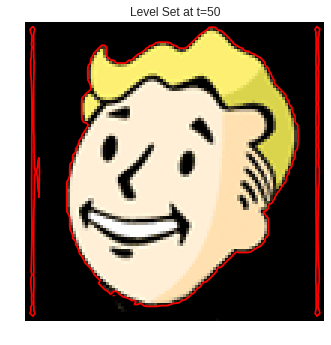

In [0]:
#Save jpg files
import os
os.makedirs('./gif_frames')
for i in range(50):
  plt.clf()
  plt.imshow(img_ori)
  plt.contour(phi_recorder[i], 0, colors='red')
  plt.title('Level Set at t={}'.format(i+1))
  plt.axis('off')
  plt.savefig('./gif_frames/frame_{0:04}.jpg'.format(i+1))
  

In [0]:
# Gif download
filenames = os.listdir('./gif_frames')
filenames.sort()
images = []
for filename in filenames:
  images.append(imageio.imread('./gif_frames/'+filename))
imageio.mimsave('./mono.gif', images)
files.download('./mono.gif') 

In [0]:
# JPG Download
for i in range(50):
  files.download('./gif_frames/frame_{0:04}.jpg'.format(i+1)) 
  

### 3.2. Narrow Band Example

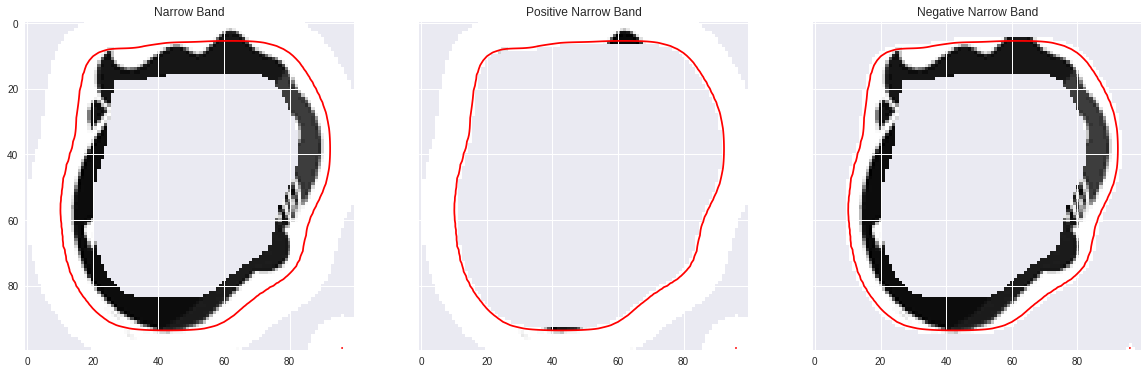

In [0]:
# Narrow Band
narrow_band_width = 10
dis = skfmm.distance(phi, narrow=narrow_band_width)
pos = np.ma.masked_where(dis < -1, dis)
neg = np.ma.masked_where(dis > 1, dis)
img_narrow = np.ma.array(img, mask=dis.mask)
img_pos = np.ma.masked_where(np.ma.getmask(pos), img)
img_neg = np.ma.masked_where(np.ma.getmask(neg), img)

# Narrow Band Plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20,10))
ax1.contour(phi, 0, colors='red')
ax1.set_title('Narrow Band')
ax1.imshow(img_narrow)
ax1.set(adjustable='box-forced', aspect='equal')
ax2.contour(phi, 0, colors='red')
ax2.set_title('Positive Narrow Band')
ax2.imshow(img_pos)
ax2.set(adjustable='box-forced', aspect='equal')
ax3.contour(phi, 0, colors='red')
ax3.set_title('Negative Narrow Band')
ax3.imshow(img_neg)
ax3.set(adjustable='box-forced', aspect='equal')
plt.show()

# Random Samples Extraction
k = 100
samples_pos = np.random.choice(img_pos[~img_pos.mask].flatten(), size=k, replace=False)
samples_neg = np.random.choice(img_neg[~img_neg.mask].flatten(), size=k, replace=False)

### 3.3. Velocities Extension Example

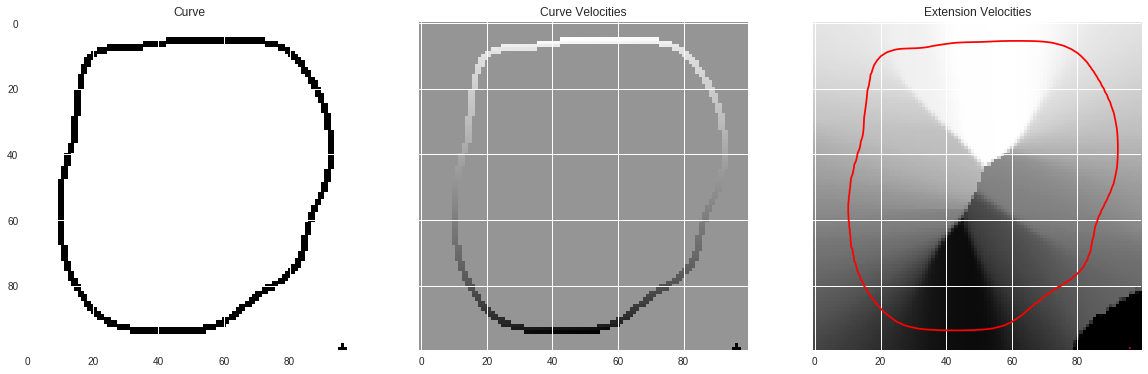

In [0]:
# Curve Border Positions
curve_idx = np.argwhere(abs(dis) < 1)

# Curve on array
curve = np.zeros(img.shape)
for x, y in curve_idx:
  curve[x, y] = 255

# Curve velocities per position
curve_v = np.zeros(img.shape)
v = np.linspace(-1, 1, len(curve_idx))
for i in range(len(curve_idx)):
  curve_v[curve_idx[i][0], curve_idx[i][1]] = v[i]

# Curve velocities extension
d, f_ext = skfmm.extension_velocities(phi, curve_v)

# Curve Plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20,10))
ax1.set_title('Curve')
ax1.imshow(curve)
ax1.set(adjustable='box-forced', aspect='equal')
ax2.set_title('Curve Velocities')
ax2.imshow(curve_v)
ax2.set(adjustable='box-forced', aspect='equal')
ax3.imshow(f_ext)
ax3.contour(phi, 0, colors='red')
#ax3.contourf(f_ext)
ax3.set_title('Extension Velocities')
ax3.set(adjustable='box-forced', aspect='equal')
plt.show()